In [ ]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Limpieza de datos. Apply. Expresiones regulares.

La limpieza es un paso necesario en todo proyecto de datos. 

Podemos resumir el proceso de limpieza de datos en las siguientes cinco tareas:

**1. Resolver problemas de formato y asignar tipos de datos correctos.**

Por ejemplo, cuando al pasar de CSV a Pandas una fecha no se importa correctamente como puede ser el caso de un campo fecha donde se importa 20090609231247 en lugar de 2009-06-09 23:12:47.

El formato en que se encuentran los datos determina qué operaciones pueden realizarse sobre ellos.

**2. Estandarizar categorías.**

Cuando los datos se recolectaron con un sisstema que no tiene valores tipificadaos, valores que representan la misma categoría pueden estar expresados de forma distinta. Por ejemplo: Arg, AR, Argentina

**3. Corregir valores erróneos.**

Por ejemplo: un valor numérico o inválido para describir el género; o una edad representada por un número negativo o mucho mayor que 100.

**4. Completar datos faltantes.**

Los datasets del mundo real suelen venir con datos faltantes que responden a información que se perdió o nunca se recolectó. Existen varias técnicas para completar datos faltantes. Al proceso de completar datos faltantes se lo llama "imputación".

**5. Organizar el dataset.**

Es importante estructurar las filas y columnas de la forma más conveniente. Para hacerlo se pueden aplicar las reglas del "tidy data".



## Dataset

El Met (Metropolitan Museum of Art) provee datasets de información de más de 420.000 piezas de arte en su colección.

https://github.com/metmuseum/openaccess/

Los problemas que presentan este dataset incluyen:
* Valores faltantes
* Posibles duplicaciones
* Campos con mezcla de campos de tipo numérico con cadenas de caracteres

En esta clase vamos a detectar algunos de los qué campos presentan problemas, y solucionarlos usando las herramientas que adquirimos en las prácticas guiadas.


## Ejercicio 1:

Vamos a leer en la variable `data` los datos del archivo /M2/CLASE_05_Limpieza_de_datos/Data/MetObjects_sample.csv en un `DataFrame` de pandas con el método `read_csv` 

Veamos cuántas filas y columnas tiene el DataFrame data

In [1]:
import pandas as pd 
data = pd.read_csv('../Data/MetObjects_sample.csv')
data.head()

,Unnamed: 0,Object Number,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL
0,297513,Inst.1980.3.1,False,False,False,442985,Islamic Art,NaN,Illustrated single work,Illustrated Single Work,...,NaN,NaN,Codices,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Abstraction,http://vocab.getty.edu/page/aat/300056508
1,366196,175T49 R43,True,False,False,591826,The Libraries,NaN,NaN,Vita del Tintoretto,...,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29385980,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
2,380983,WW.550,False,False,False,650203,Drawings and Prints,NaN,Print,Flowers and Dragonfly,...,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Dragonflies|Flowers,http://vocab.getty.edu/page/aat/300310476|http...
3,379184,WW.211,False,False,False,647832,Drawings and Prints,NaN,Print,Old Karlsbad: City Tower (Alt-Karlsbad Stadtturm),...,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Towers,http://vocab.getty.edu/page/aat/300004847
4,472119,24.63.2060,False,False,False,838838,Drawings and Prints,NaN,Print,"Victor Hugo, published in Le Masque",...,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN


In [2]:
data.shape

(4743, 52)

## Ejercicio 2: Formato y tipos de datos

Vamos a ver de qué tipo de datos es cada columna del DataFrame, y vamos a convertir o dar formato **a alguna de las columnas** que tienen tipo de datos incorrecto.

### 2.a Detectar las columnas que tienen tipo de datos incorrecto

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4743 non-null   int64  
 1   Object Number            4743 non-null   object 
 2   Is Highlight             4743 non-null   bool   
 3   Is Public Domain         4743 non-null   bool   
 4   Is Timeline Work         4743 non-null   bool   
 5   Object ID                4743 non-null   int64  
 6   Department               4743 non-null   object 
 7   AccessionYear            3743 non-null   object 
 8   Object Name              4655 non-null   object 
 9   Title                    3914 non-null   object 
 10  Culture                  2318 non-null   object 
 11  Period                   1319 non-null   object 
 12  Dynasty                  184 non-null    object 
 13  Reign                    71 non-null     object 
 14  Portfolio               

### 2.b AccessionYear

Analizar la columna AccessionYear que fue leída como object, y debería ser int.

¿Qué valores toma ese campo? ¿Cómo se distribuyen esos valores? ¿Hay valores nulos?

Queremos extraer el dato año de los valores no numéricos, y crear una nueva columna en el DataFrame de tipo int que se llame AccessionYearClean y tenga estos valores.

Para eso vamos a usar expresiones regulares, apply y lambda.

Observación: si la columna tiene valores NaN no vamos a poder convertirla al tipo int. Una opción es reemplazar los valores NaN por algún entero antes de convertir (`fillna`). La otra opción es dejar la columna como tipo float (el tipo de NaN es float).


In [4]:
data.AccessionYear

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
4738    1941
4739    1979
4740    1979
4741    1953
4742    1963
Name: AccessionYear, Length: 4743, dtype: object

<Axes: xlabel='AccessionYear', ylabel='Count'>

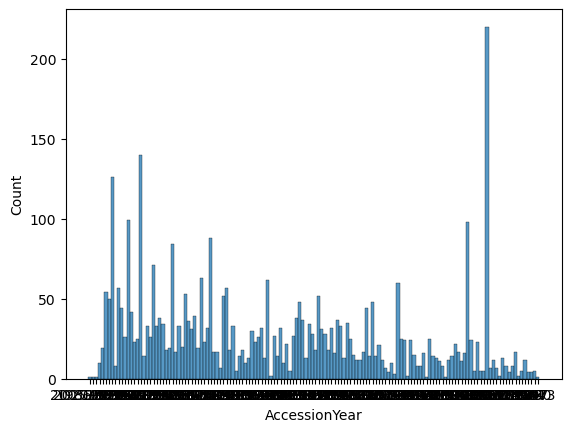

In [5]:
import seaborn as sns 

sns.histplot(data.AccessionYear)

In [ ]:
## [BORRAR_PRESENCIAL]
import re
import numpy as np 

pattern_fecha = "(?P<year>\d\d\d\d)(?P<month_day>\-\d\d\-\d\d)*"
pattern_fecha_regex =  re.compile(pattern_fecha)
#resultado_fechas = data.AccessionYear.apply(lambda x: x if (x is np.NaN) | (x is None) else pattern_fecha_regex.match(x))
resultado_fechas = data.AccessionYear.apply(lambda x: x if x is np.NaN else pattern_fecha_regex.match(x))

year_match = resultado_fechas.apply(lambda x: x if x is np.NaN else x.group("year"))
print(year_match.dtype)


#opcion 1
year_match_fill = year_match.fillna(0)
year_match_fill_numeric = year_match_fill.astype(int)

# opcion 2
year_match_numeric = year_match.astype(float)

#data["AccessionYearClean"] = year_match_numeric
data["AccessionYearClean"] = year_match_fill_numeric
data.dtypes

## Ejercicio 3: Categorias - Valores erróneos

Miremos ahora el campo "Artist Gender"

¿Qué valores toma ese campo? ¿Cómo se distribuyen esos valores? ¿Hay valores nulos?

Queremos definir como categorías válidas Male, Female y Unknown

Y crear una nueva columna en el DataFrame que se llame ArtistGenderClean y tenga estos valores.

Para eso vamos a usar expresiones regulares, apply y lambda.

¿Podemos deducir cómo está representada la categoría Male en el dataset original?

Nota: La propuesta que hacemos para limpiar este campo no es del todo correcta, y vamos a ver por qué más adelante. Pero sirve como ejercicio.


## Ejercicio 4: Imputación

Vamos a analizar ahora los campos "Object Date", "Object Begin Date", "Object End Date"

**4.a ¿Cuántos valores nulos hay en "Object Date"? ¿Cuántos en "Object Begin Date"? ¿Cuántos en "Object End Date"?**


**4.b Usaremos los valores de "Object Begin Date" o "Object End Date" para imputar los valores de "Object Date" con alguno de esos dos campos.**

1) Vamos a crear una columna nueva ("Object Date 4b") donde copiamos todos los datos de Object Date (para no cambiar los valores originales y nos sirvan para el próximo ejercicio)

2) Vamos a rellenar la columna "Object Date 4b" con la estrategia que planteamos.

**4.c Usaremos aleatoriamente los valores de "Object Begin Date" o "Object End Date" para imputar los valores de "Object Date" con alguno de esos dos campos.**

Para eso definimos una función get_fill_value que recibe como parámetro una fila da data, y si el valor del campo "Object Date" es nulo devuelve aleatoriamente el valor del campo "Object Begin Date" u "Object End Date" de ese registro.

(En este ejercicio practicamos todo!)

Vamos a contar ahora cuántos registros rellenó con los valores de Object Begin Date y cuántos con Object End Date

## Nota: Organizar el dataset

Para llevar a cabo esta tarea necesitamos algunas herramientas que veremos en la segunda parte de Pandas.

En esa clase vamos a volver a este ejercicio y resolver este punto.

Los campos que vamos a analizar son "Artist Nationality" y "Artist Display Name"

In [ ]:
data["Artist Nationality"].value_counts()

In [ ]:
data["Artist Display Name"].value_counts() 